In [1]:
# ? Import necessary libraries
import math

import matplotlib.pyplot as plt
import numpy as np
from loguru import logger

from dual_autodiff.autodiff import differentiate
from dual_autodiff.dual import Dual

In [2]:
# ? Define the target function
def f(x: Dual) -> Dual:
    """Compute the expression log(sin(x)) + x^2 * cos(x) using dual numbers."""
    return x.log() + (x * x) * x.cos()



In [3]:
# ? Compute the derivative using dual numbers at x = 1.5
x_val = 1.5
dual_derivative = differentiate(f, x_val)
logger.info(f"Derivative at x = 1.5 using dual numbers: {dual_derivative}")


2024-11-14 15:59:05.940 | INFO     | __main__:<module>:4 - Derivative at x = 1.5 using dual numbers: -1.365485448189347


In [4]:
# ? Define the analytical derivative and compute it at x = 1.5
def analytical_derivative(x: float) -> float:
    """Compute the analytical derivative of log(sin(x)) + x^2 * cos(x)."""
    return (math.cos(x) / math.sin(x)) + 2 * x * math.cos(x) - (x**2) * math.sin(x)


analytical_result = analytical_derivative(x_val)
logger.info(f"Analytical derivative at x = 1.5: {analytical_result}")



2024-11-14 15:59:05.958 | INFO     | __main__:<module>:8 - Analytical derivative at x = 1.5: -1.9612372705533612


In [5]:
def f_numeric(x: float) -> float:
    """Evaluate log(sin(x)) + x^2 * cos(x) numerically for finite difference calculation."""
    return math.log(math.sin(x)) + x**2 * math.cos(x)

# Define a range of step sizes and compute numerical derivatives
step_sizes = np.logspace(-5, -1, 100)  # Step sizes from 1e-5 to 1e-1
numerical_derivatives = [(f_numeric(x_val + h) - f_numeric(x_val)) / h for h in step_sizes]


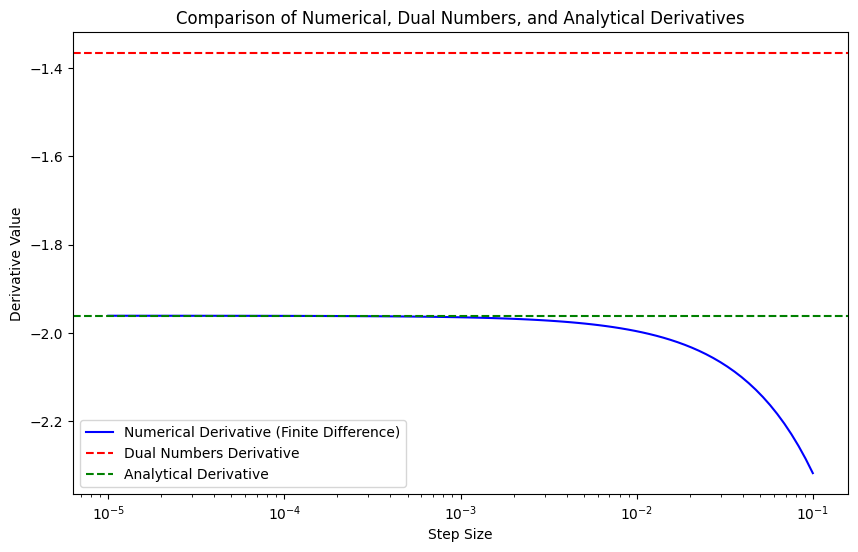

In [6]:
# ? Plot the results to compare derivatives
plt.figure(figsize=(10, 6))
plt.plot(
    step_sizes,
    numerical_derivatives,
    label="Numerical Derivative (Finite Difference)",
    color="blue",
)
plt.axhline(dual_derivative, color="red", linestyle="--", label="Dual Numbers Derivative")
plt.axhline(analytical_result, color="green", linestyle="--", label="Analytical Derivative")
plt.xscale("log")
plt.xlabel("Step Size")
plt.ylabel("Derivative Value")
plt.legend()
plt.title("Comparison of Numerical, Dual Numbers, and Analytical Derivatives")
plt.show()

Observations:
- As the step size decreases, the numerical derivative approaches the analytical
- For larger step sizes, the numerical derivative diverges due to instability
